# FIFA World Cup Matches Analysis with Pandas

In [41]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
# Load the dataset and convert date column to datetime.

df=pd.read_csv('https://raw.githubusercontent.com/martj42/international_results/master/results.csv')

df.head(5 )

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [43]:
df.shape

(48207, 9)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48207 entries, 0 to 48206
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        48207 non-null  object
 1   home_team   48207 non-null  object
 2   away_team   48207 non-null  object
 3   home_score  48207 non-null  int64 
 4   away_score  48207 non-null  int64 
 5   tournament  48207 non-null  object
 6   city        48207 non-null  object
 7   country     48207 non-null  object
 8   neutral     48207 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 3.0+ MB


In [45]:
# checking missing values
df.isnull().sum()


date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

### Time Series Essentials

In [46]:
df['date']=pd.to_datetime(df['date'])

In [47]:
# Extract year and month from the date.

df['Month']=df['date'].dt.month_name()
df['Year']=df['date'].dt.year

In [48]:
df.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Month,Year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,November,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,March,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,March,1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,March,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,March,1876


In [49]:
# Filter matches between 2000 and 2022.

df_2000_2022=df[(df['Year'] >= 2000) & (df['Year'] <=2022)]

df_2000_2022


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Month,Year
24076,2000-01-04,Egypt,Togo,2,1,Friendly,Aswan,Egypt,False,January,2000
24077,2000-01-07,Tunisia,Togo,7,0,Friendly,Tunis,Tunisia,False,January,2000
24078,2000-01-08,Trinidad and Tobago,Canada,0,0,Friendly,Port of Spain,Trinidad and Tobago,False,January,2000
24079,2000-01-09,Burkina Faso,Gabon,1,1,Friendly,Ouagadougou,Burkina Faso,False,January,2000
24080,2000-01-09,Guatemala,Armenia,1,1,Friendly,Los Angeles,United States,True,January,2000
...,...,...,...,...,...,...,...,...,...,...,...
45779,2022-12-30,Iraq,Kuwait,1,0,Friendly,Basra,Iraq,False,December,2022
45780,2022-12-30,Oman,Syria,1,0,Friendly,Dubai,United Arab Emirates,True,December,2022
45781,2022-12-30,United Arab Emirates,Lebanon,1,0,Friendly,Abu Dhabi,United Arab Emirates,False,December,2022
45782,2022-12-30,Myanmar,Laos,2,2,AFF Championship,Yangon,Myanmar,False,December,2022


In [50]:
# Count number of matches per year.

match_per_year=df_2000_2022.groupby('Year').size()
match_per_year


Year
2000    1040
2001    1031
2002     768
2003     947
2004    1079
2005     804
2006     842
2007     988
2008    1101
2009     925
2010     860
2011    1115
2012    1017
2013     954
2014     848
2015    1039
2016     919
2017     924
2018     929
2019    1147
2020     347
2021    1115
2022     969
dtype: int64

Text(0, 0.5, 'Match Count')

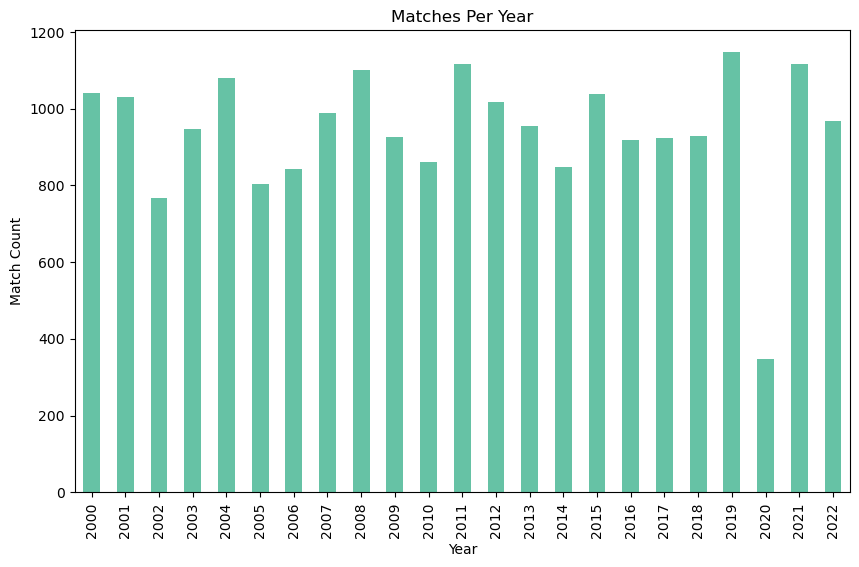

In [51]:
# Plot number of matches played each year.

match_per_year.plot(kind='bar',colormap='Set2',figsize=(10,6),title='Matches Per Year')
plt.xlabel('Year')
plt.ylabel('Match Count')

### GroupBy and Aggregation

In [52]:
# Group by home_team and count matches.

df.groupby('home_team').size().sort_values(ascending=False)

home_team
Brazil               606
Argentina            596
Mexico               584
Germany              547
South Korea          544
                    ... 
Central Spain          1
Kabylia                1
West Papua             1
Franconia              1
Western Australia      1
Length: 324, dtype: int64

In [53]:
# Group by tournament to see match count per tournament.

df.groupby('tournament').size().sort_values(ascending=False )

tournament
Friendly                                18070
FIFA World Cup qualification             8367
UEFA Euro qualification                  2824
African Cup of Nations qualification     2278
FIFA World Cup                            964
                                        ...  
ConIFA Challenger Cup                       1
Real Madrid 75th Anniversary Cup            1
Copa Confraternidad                         1
FIFA 75th Anniversary Cup                   1
Évence Coppée Trophy                        1
Length: 182, dtype: int64

In [54]:
 df['tournament'].value_counts()

tournament
Friendly                                18070
FIFA World Cup qualification             8367
UEFA Euro qualification                  2824
African Cup of Nations qualification     2278
FIFA World Cup                            964
                                        ...  
Copa Confraternidad                         1
TIFOCO Tournament                           1
Évence Coppée Trophy                        1
The Other Final                             1
Benedikt Fontana Cup                        1
Name: count, Length: 182, dtype: int64

In [55]:
# Group by year and calculate average home goals.

df.groupby('Year')['home_score'].mean()

Year
1872    0.000000
1873    4.000000
1874    2.000000
1875    2.000000
1876    3.500000
          ...   
2021    1.649327
2022    1.511868
2023    1.680266
2024    1.555175
2025    1.715000
Name: home_score, Length: 154, dtype: float64

In [56]:
# Who scored the most total goals as a home team?

df.groupby('home_team')['home_score'].sum().sort_values(ascending=False).head(20)

home_team
Brazil         1491
Germany        1364
Argentina      1332
England        1241
Sweden         1232
Mexico         1185
Hungary        1123
Netherlands    1116
France         1106
South Korea    1100
Italy          1006
Malaysia        966
Spain           960
Denmark         943
Belgium         932
Japan           916
Austria         904
Egypt           887
China PR        881
Thailand        858
Name: home_score, dtype: int64

In [57]:
# Which teams have played the most away games?

df['away_team'].value_counts()

away_team
Uruguay          576
Sweden           561
England          536
Hungary          503
Paraguay         487
                ... 
Barawa             1
Asturias           1
Central Spain      1
Cilento            1
Ticino             1
Name: count, Length: 317, dtype: int64

###  Comparative Stats

In [58]:
# Compare average goals scored by home vs away teams.

avg_home_goals = df['home_score'].mean()
avg_home_goals

1.7598896425830273

In [59]:
avg_away_goals = df['away_score'].mean()
avg_away_goals 

1.1820482502541125

In [60]:
# Create a new column goal_diff = home_score - away_score.
df['goal_diff'] = df['home_score'] - df['away_score']

df.sample()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Month,Year,goal_diff
14192,1984-06-17,Suriname,India,4,1,Friendly,Paramaribo,Suriname,False,June,1984,3


In [61]:
# Which team has the highest average goal difference?

df.groupby('home_team')['goal_diff'].mean().sort_values(ascending=False)

home_team
Elba Island                   5.000000
Parishes of Jersey            4.000000
Cascadia                      3.500000
Chameria                      3.000000
Northern Cyprus               2.818182
                               ...    
Kiribati                    -12.600000
Saint Pierre and Miquelon   -15.000000
Niue                        -16.500000
Darfur                      -17.250000
Sark                        -20.000000
Name: goal_diff, Length: 324, dtype: float64

In [66]:
# Count matches that ended in a draw.

df[df['goal_diff'] == 0].shape[0]

10954

In [69]:
# How many times has Brazil won a match?
brazil_home_wins = df[(df['home_team'] == 'Brazil') & (df['home_score'] > df['away_score'])]
brazil_away_wins = df[(df['away_team'] == 'Brazil') & (df['away_score'] > df['home_score'])]
total_brazil_wins = len(brazil_home_wins) + len(brazil_away_wins)
total_brazil_wins

665

### Head-to-Head Insights

In [71]:
# Find matches where Germany played France.

germany_france = df[((df['home_team'] == 'Germany') & (df['away_team'] == 'France')) |
                    ((df['home_team'] == 'France') & (df['away_team'] == 'Germany'))]

germany_france .shape[0]


34

In [72]:
# How many times has Argentina beaten Brazil?

arg_wins = df[((df['home_team'] == 'Argentina') & (df['away_team'] == 'Brazil') & (df['home_score'] > df['away_score'])) |
              ((df['away_team'] == 'Argentina') & (df['home_team'] == 'Brazil') & (df['away_score'] > df['home_score']))]

arg_wins

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Month,Year,goal_diff
448,1914-09-20,Argentina,Brazil,3,0,Friendly,Buenos Aires,Argentina,False,September,1914,3
515,1917-10-03,Argentina,Brazil,4,2,Copa América,Montevideo,Uruguay,True,October,1917,2
639,1920-09-25,Argentina,Brazil,2,0,Copa América,Viña del Mar,Chile,True,September,1920,2
691,1921-10-02,Argentina,Brazil,1,0,Copa América,Buenos Aires,Argentina,False,October,1921,1
862,1923-11-18,Argentina,Brazil,2,1,Copa América,Montevideo,Uruguay,True,November,1923,1
869,1923-12-09,Argentina,Brazil,2,0,Copa Roca,Buenos Aires,Argentina,False,December,1923,2
1066,1925-12-13,Argentina,Brazil,4,1,Copa América,Buenos Aires,Argentina,False,December,1925,3
2171,1937-01-30,Argentina,Brazil,1,0,Copa América,Buenos Aires,Argentina,False,January,1937,1
2173,1937-02-01,Argentina,Brazil,2,0,Copa América,Buenos Aires,Argentina,False,February,1937,2
2426,1939-01-15,Brazil,Argentina,1,5,Copa Roca,Rio de Janeiro,Brazil,False,January,1939,-4


In [73]:
# Who won most often between Spain and Italy?

spain_italy = df[((df['home_team'] == 'Spain') & (df['away_team'] == 'Italy')) |
                 ((df['home_team'] == 'Italy') & (df['away_team'] == 'Spain'))]

spain_italy

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Month,Year,goal_diff
631,1920-09-02,Spain,Italy,2,0,Olympic Games,Antwerp,Belgium,True,September,1920,2
881,1924-03-09,Italy,Spain,0,0,Friendly,Milan,Italy,False,March,1924,0
906,1924-05-25,Italy,Spain,1,0,Olympic Games,Colombes,France,True,May,1924,1
1021,1925-06-14,Spain,Italy,1,0,Friendly,Valencia,Spain,False,June,1925,1
1188,1927-05-29,Italy,Spain,2,0,Friendly,Bologna,Italy,False,May,1927,2
1269,1928-04-22,Spain,Italy,1,1,Friendly,Gijón,Spain,False,April,1928,0
1288,1928-06-01,Italy,Spain,1,1,Olympic Games,Amsterdam,Netherlands,True,June,1928,0
1292,1928-06-04,Italy,Spain,7,1,Olympic Games,Amsterdam,Netherlands,True,June,1928,6
1490,1930-06-22,Italy,Spain,2,3,Friendly,Bologna,Italy,False,June,1930,-1
1570,1931-04-19,Spain,Italy,0,0,Friendly,Bilbao,Spain,False,April,1931,0


In [78]:
import numpy as np


spain_italy = spain_italy.copy()

# np.select to set the winner
conditions = [
    spain_italy['home_score'] > spain_italy['away_score'],
    spain_italy['home_score'] < spain_italy['away_score']
]
choices = [spain_italy['home_team'], spain_italy['away_team']]

spain_italy['winner'] = np.select(conditions, choices, default='Draw')

# Count how many times each team won
win_counts = spain_italy['winner'].value_counts()

win_counts


winner
Draw     16
Spain    14
Italy    11
Name: count, dtype: int64

In [75]:
# List matches with most goals scored (home + away).

df['total_goals'] = df['home_score'] + df['away_score']
most_goals = df[df['total_goals'] == df['total_goals'].max()]

most_goals

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Month,Year,goal_diff,total_goals
25438,2001-04-11,Australia,American Samoa,31,0,FIFA World Cup qualification,Coffs Harbour,Australia,False,April,2001,31,31


In [77]:
# Find the match with the biggest goal difference.

max_diff = df[df['goal_diff'].abs() == df['goal_diff'].abs().max()]
max_diff 


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Month,Year,goal_diff,total_goals
25438,2001-04-11,Australia,American Samoa,31,0,FIFA World Cup qualification,Coffs Harbour,Australia,False,April,2001,31,31


In [ ]:

🗂️ Sorting and Filtering
Sort all matches by number of total goals.

Show top 10 highest scoring games.

List all matches held in “Final” rounds.

Filter matches with over 5 total goals.

List all draws between England and Germany.

📊 Pivot Tables
Create pivot table: average goals by tournament.

Pivot table: count of matches by year and tournament.

Show average goals per month.

Show goals scored by each team per decade.

Visualize average home goals by year using pivot and plot.

📈 Visualizations
Line plot: goals scored per year.

Bar chart: top 10 countries with most wins.

Histogram: goal differences across all matches.

Box plot: goal difference per tournament.

Heatmap: matches by year vs tournament.

🧩 Custom Columns & Conditions
Add winner column (home/away/draw).

Add column is_world_cup = True if tournament == 'FIFA World Cup'.

Add column for total goals in each match.

Flag blowout games (goal difference > 3).

Create match_result column (e.g., "BRA 2 - 1 ARG").

🧾 Descriptive Stats
What’s the mean, min, max goals scored per match?

Median total goals per match in World Cup only.

Total number of matches played between 2010–2022.

Max number of matches played in any year.

Average number of goals per team per game.

📦 Saving Results
Export head-to-head stats for Brazil vs Argentina to CSV.

Save summary of tournament goal averages to Excel.

Save all World Cup final matches to a new CSV.

Save cleaned and enhanced dataset to pickle.

Create PDF report of top 10 matches with the most goals.

SyntaxError: invalid character '🔥' (U+1F525) (179263530.py, line 1)